In [ ]:
import pandas as pd
import numpy as np
import re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data2/clean_data.csv')

In [ ]:
df.shape

(31835, 9)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/parsed_data/cleaned_corpus.csv')

In [ ]:
a = pd.read_excel('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/dbo_view_klasterizavimas_veiklu_evrk.xlsx')
b = pd.read_excel('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/dbo_view_klasterizavimas_main1.xlsx')

In [ ]:
a.sample(1)

,nace_2_integer,evrk_2,gr_code,gr_stat_letter,gr_stat_code,gr_4digits,code_explanation_lt_utf,code_explanation_en,is_group
135,108910,10.89.10,30,C,C10,1089,Mielių gamyba,Manufacture of other food products n.e.c.,0


In [ ]:
b = b[['RegNumN', 'Nace2', 'EmployeesLast']]
b.rename(columns={'RegNumN':'imones_kodas'}, inplace=True)
b.sample(2)

<ipython-input-11-bcccb5e3d946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.rename(columns={'RegNumN':'imones_kodas'}, inplace=True)


,imones_kodas,Nace2,EmployeesLast
115416,303204648,999900,0
118130,303289709,702200,0


In [ ]:
df = df.merge(b, how='left', on='imones_kodas')

In [ ]:
a = a[['nace_2_integer', 'gr_stat_letter', 'gr_stat_code', 'gr_4digits', 'gr_code']]
a.rename(columns={'nace_2_integer':'Nace2'}, inplace=True)
a.sample(2)

<ipython-input-13-0d25aafb08a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.rename(columns={'nace_2_integer':'Nace2'}, inplace=True)


,Nace2,gr_stat_letter,gr_stat_code,gr_4digits,gr_code
1023,889900,Q,Q88,8899,63
750,553000,I,I55,5530,1


In [ ]:
df = df.merge(a, how='left', on='Nace2')

In [ ]:
df.dropna(inplace=True)

In [ ]:
PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/Rekvizit_Veikla.txt'

# Data Loading

In [ ]:
data = []
with open(PATH, 'r') as f:
  for line in f:
    entry = {}
    entry['has_desc'] = 0
    info = line.split('\t')
    entry['imones_kodas'] = info[0].strip()
    entry['imones_pavadinimas'] = info[1]
    if info[3].startswith('Aprašymo nėra'):
      try:
        entry['imones_aprasymas'] = re.findall(r'(?:Pagrindin|Veiklos|Kitos).*?\.', info[3])[0]
      except Exception:
        pass
    elif info[3].startswith('Aprašymas'):
      entry['imones_aprasymas'] = ' '.join(re.findall(r'\b(?!Aprašymas)\b.*?\.', info[3]))
      entry['has_desc'] = 1
    data.append(entry)

In [ ]:
print(f"Pilnas duomenų rinkinys turi: {len(data)} įrašų")

Pilnas duomenų rinkinys turi: 240492 įrašų


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df[df['imones_kodas'] != '']
df = df[df['imones_aprasymas'] != '']
df = df[df['imones_pavadinimas'] != '']

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(f"Išvalius trūkstamas reikšmes, duomenų rinkinys turi {df.shape[0]}")
print(f"Aprašymus turi {df[df.has_desc == 1].shape[0]}, tik pateiktas veiklas turi {df[df.has_desc == 0].shape[0]}")

Išvalius trūkstamas reikšmes, duomenų rinkinys turi 147125
Aprašymus turi 36471, tik pateiktas veiklas turi 110654


In [ ]:
df.to_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/rek_parsed.csv', index=False)
df[df.has_desc == 1].to_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/rek_su_aprasymais.csv', index=False)

In [ ]:
df = df[df.has_desc == 1]

In [ ]:
df['desc_len'] = df['imones_aprasymas'].str.count(r'\w+')

# Data Cleaning

In [ ]:
clean_biz = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/rek_su_aprasymais_2.csv', usecols=['imones_kodas'])

In [ ]:
clean_biz['imones_kodas'] = clean_biz['imones_kodas'].astype(str)
df['imones_kodas'] = df['imones_kodas'].astype(str)

In [ ]:
df.drop(['has_desc'], axis=1, inplace=True)

In [ ]:
df = df[df['imones_kodas'].isin(list(clean_biz['imones_kodas']))]

In [ ]:
!python3 -m spacy download lt_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 MB 14.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('lt_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install snowballstemmer

In [ ]:
import string
import re
import spacy
import snowballstemmer
nlp = spacy.load("lt_core_news_md")


def cleaning_descriptions(x, y):
  # Preping business name parts
  table = str.maketrans("","", string.punctuation)
  y_ = y.translate(table).lower().split()

  # Text to lowercase
  x = x.lower()

  # Remove websites
  pattern = r'(https?://)?(www\.)?[\w\s]+\.\w+'
  x = re.sub(pattern, '', x)

  # Removing particular artifacts
  str_to_remove = ['&rdquo', '&bull', '[email&#160;protected]', 'kontaktai',
                   'mob.', 'tel.', 'el.', 'paštas', 'telefonu', 'telefonai']
  for r in str_to_remove+y_:
    x = x.replace(r, '')

  # Remove all digits
  x = re.sub('[0-9]', '', x)

  # Removing all punctuations
  table = str.maketrans("","", string.punctuation + "„“‘–")
  x = x.translate(table)

  # Removing stopwords
  doc = nlp(x)
  x_filtered = [token.text for token in doc if not token.is_stop]
  x = ' '.join(x_filtered)

  # Removing additional empty spaces
  x = re.sub(' +', ' ', x)

  # Stemming
  stemmer = snowballstemmer.stemmer('lithuanian')
  x = ' '.join(stemmer.stemWords(x.split()))
  return x.strip()

In [ ]:
df['desc_post'] = df.apply(lambda row: cleaning_descriptions(row['imones_aprasymas'], row['imones_pavadinimas']), axis=1)

In [ ]:
df_2 = df.drop('imones_aprasymas', axis=1)

In [ ]:
df_2 = df_2[df_2['desc_post'] != '']

In [ ]:
df_2.drop('desc_len', axis=1, inplace=True)
df_2.to_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/data_postprocessed.csv', index=False)

<ipython-input-193-e4fe080ca78e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('desc_len', axis=1, inplace=True)


In [ ]:
df_2['desc_len'] = df_2['desc_post'].str.count(r'\w+')

<ipython-input-194-55f61c15148b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['desc_len'] = df_2['desc_post'].str.count(r'\w+')


In [ ]:
#df_2['imones_pavadinimas'] = df_2['imones_pavadinimas'].str.replace(",", " ")

In [ ]:
df_2[df_2.imones_kodas.isin(['300008676'])]

,imones_kodas,imones_pavadinimas,desc_post,desc_len
168738,300008676,Strive Baltic UAB,nauj tradedoubler vard lietuv įmon teik inter...,10


In [ ]:
df_2.sample(5)

,imones_kodas,imones_pavadinimas,desc_post,desc_len
31660,124633684,Dionita UAB,moteriš drabuž trikotaž mažmenin prekyb,5
136560,300902683,Sbetonas UAB,prekin beton gamyb pristatym betonvež savivart...,9
193103,155492192,Ignalinos rajono Kaniūkų ŽŪB,žem ūk bendrov augin grūdin kultūr obuol uog,8
39514,152800724,Airida N. Slidziauskienės IĮ,kavi sodyb vilioš įsikūr akme rajo vilioš ka...,9
92146,134937568,Vitae Litera UAB,žurnal knyg leidyb medicin tem žurnal lietuv b...,33


# Data Sources Combination

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/parsed_data/description_dataset.csv')
nace_codes = pd.read_excel('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/dbo_view_klasterizavimas_main1.xlsx')
nace_desc = pd.read_excel('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/dbo_view_klasterizavimas_veiklu_evrk.xlsx')

In [ ]:
nace_codes = nace_codes[['EmployeesLast','RegNumN', 'Nace2']]
nace_codes.rename(columns={'RegNumN':'imones_kodas'}, inplace=True)

<ipython-input-16-73c8192a7919>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nace_codes.rename(columns={'RegNumN':'imones_kodas'}, inplace=True)


In [ ]:
nace_desc = nace_desc[['nace_2_integer', 'evrk_2', 'gr_code', 'gr_stat_letter', 'gr_stat_code', 'gr_4digits']]
nace_desc.rename(columns={'nace_2_integer':'Nace2'}, inplace=True)

In [ ]:
nace_desc.drop('evrk_2', axis=1, inplace=True)

In [ ]:
nace_desc.dtypes

Nace2              int64
gr_code            int64
gr_stat_letter    object
gr_stat_code      object
gr_4digits         int64
dtype: object

In [ ]:
full_df = pd.merge(df, nace_codes, on='imones_kodas', how='left')
full_df = pd.merge(full_df, nace_desc, on='Nace2', how='left')

In [ ]:
full_df.isna().sum()

imones_kodas             0
imones_pavadinimas       0
imones_aprasymas         0
desc_len                 0
EmployeesLast         2495
Nace2                 2495
gr_code               2495
gr_stat_letter        2495
gr_stat_code          2495
gr_4digits            2495
dtype: int64

In [ ]:
full_df.dropna(inplace=True)

In [ ]:
full_df['Nace2'] = full_df['Nace2'].astype(int)
full_df['gr_code'] = full_df['gr_code'].astype(int)
full_df['gr_4digits'] = full_df['gr_4digits'].astype(int)
full_df['EmployeesLast'] = full_df['EmployeesLast'].astype(int)

In [ ]:
full_df.to_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/parsed_data/full_dataset.csv', index=False)

In [ ]:
df = full_df.copy(deep=True)

In [ ]:
df['desc_len'] = df['desc_post'].str.count(r'\w+')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.sample(4)

,imones_kodas,imones_pavadinimas,desc_post,Nace2,gr_code,gr_stat_letter,gr_stat_code,gr_4digits,desc_len
33511,303190013,Namų inžinerija MB,parink nam energetin poreik atitinkt šildym įr...,432200,18,F,F43,4322,21
10493,303143775,Confidens UAB,yr licencij inform invest skirt kolektyvin inv...,663000,9,K,K66,6630,16
4398,303846859,Volfo baldai MB,nestandartin kiet bald gamyb virtuv spint pert...,310900,6,C,C31,3109,8
16474,223577550,Aktena UAB,krovin gabenim pervežim tarptautin maršrut užsi,494100,58,H,H49,4941,6


In [ ]:
df['desc_len'].min(), df['desc_len'].max()

(1, 4498)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/full_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Other

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/rek_su_aprasymais.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import string
import re
import spacy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def prep(x, y):
  table = str.maketrans("","", string.punctuation)
  y_ = y.translate(table).lower().split()

  # Text to lowercase
  x = x.lower()

  # Remove websites
  pattern = r'(https?://)?(www\.)?[\w\s]+\.\w+'
  x = re.sub(pattern, '', x)

  # Removing particular artifacts
  str_to_remove = ['&rdquo', '&bull', '[email&#160;protected]', 'kontaktai',
                    'mob.', 'tel.', 'el.', 'paštas', 'telefonu', 'telefonai']
  for r in str_to_remove+y_:
    x = x.replace(r, '')

  # Remove all digits
  x = re.sub('[0-9]', '', x)

  # Removing all punctuations
  table = str.maketrans("","", string.punctuation + "„“‘–")
  x = x.translate(table)

  x = re.sub(' +', ' ', x)

  return x

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
a['desc_post'] = a.apply(lambda row: prep(row['imones_aprasymas'], row['imones_pavadinimas']), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = []
new = a['desc_post'].str.split().values.tolist()

corpus = [word for i in new for word in i]

In [ ]:
len(corpus)

1428479

In [ ]:
from spacy.lang.lt.stop_words import STOP_WORDS

In [ ]:
from collections import defaultdict
dic = defaultdict(int)

for word in corpus:
  if word in STOP_WORDS:
    dic[word] += 1

In [ ]:
df.sample(2)

,imones_kodas,imones_pavadinimas,imones_aprasymas,desc_len,Nace2,EmployeesLast,gr_stat_letter,gr_stat_code,gr_4digits
28066,303000389,uab divisali,parduotuvės pavadinimas prekyba autoprekėmis a...,17,960200.0,1.0,S,S96,9602.0
1460,175819096,žemdirbių turgus uab,turgavietė kavinė pirtis,3,477800.0,4.0,G,G47,4778.0


In [ ]:
df.gr_4digits = df.gr_4digits.astype(int)
df.gr_4digits = df.gr_4digits.astype(str)

In [ ]:
df[df['gr_stat_letter'].isin(['G'])]

,imones_kodas,imones_pavadinimas,imones_aprasymas,desc_len,Nace2,EmployeesLast,gr_stat_letter,gr_stat_code,gr_4digits
0,140891278,decopolis uab,kolektyvo padėti klientui susikurti jaukius ši...,63,477890.0,1.0,G,G47,4778
13,300070375,paulig lietuva uab,kavos aparatai kava didmeninė mažmeninė prekyb...,15,461700.0,35.0,G,G46,4617
14,302677210,remarauto uab,uždaroji akcinė profesionalias paslaugas spren...,71,451100.0,6.0,G,G45,4511
31,158745779,egidijus ir vytautas uab,importuoja pasaulyje garsių vtuvės technikos i...,132,475900.0,29.0,G,G47,4759
37,145575444,framesta uab,plaukų priežiūros priemonės framesi didmeninė ...,8,464500.0,9.0,G,G46,4645
...,...,...,...,...,...,...,...,...,...
31814,144843487,šiaulių medtechnika uab,trečią dešimtį išklausysime patarsime pasirenk...,35,477400.0,11.0,G,G47,4774
31815,302305936,uab asia 4 you,didmeninė mažmeninė prekyba,4,479100.0,2.0,G,G47,4791
31820,300057883,auto grupė uab,mobiliai naudoti prekyba,3,451100.0,0.0,G,G45,4511
31822,233863240,r teišerskio iį,nuotaukos sklypų matavimas,4,471100.0,0.0,G,G47,4711


# Data Visualization

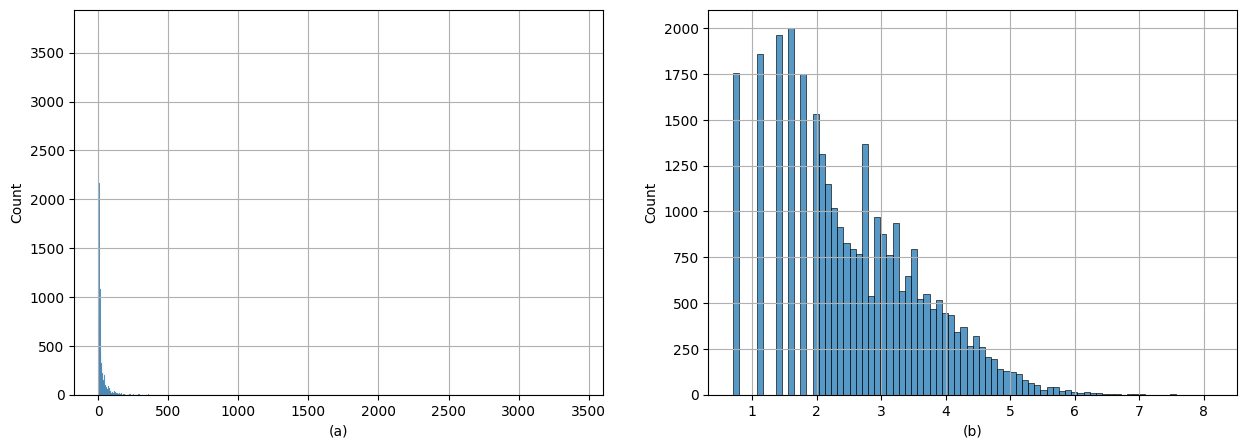

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(x=df['desc_len'], ax=ax[0])
ax[0].set_xlabel("(a)")
ax[0].grid()
sns.histplot(x=np.log(df['desc_len']), ax=ax[1])
ax[1].set_xlabel("(b)")
ax[1].grid()
plt.show()

In [ ]:
df = df[~df['imones_aprasymas'].isin([''])]

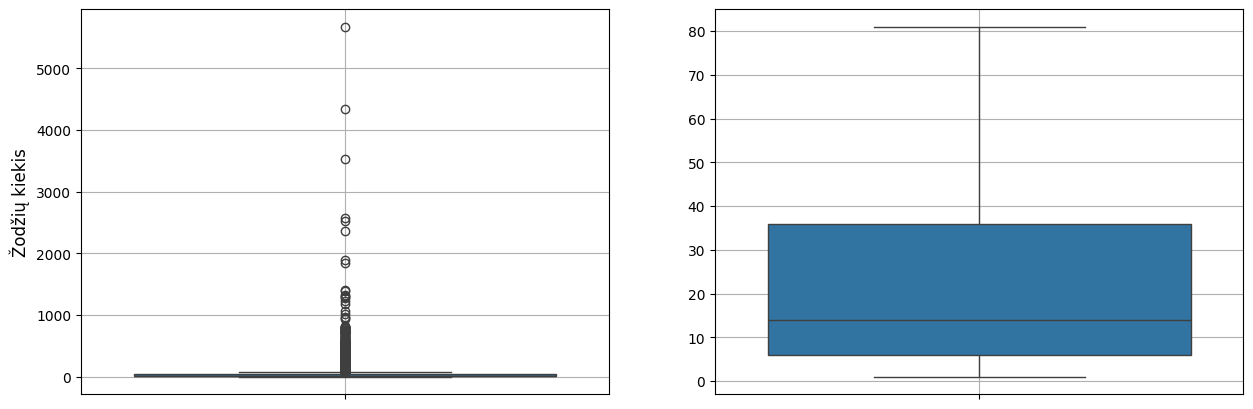

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(df['desc_len'], ax=ax[0])
ax[0].grid()
ax[0].set_ylabel('Žodžių kiekis', fontsize=12)
sns.boxplot(df['desc_len'], showfliers = False, ax=ax[1])
ax[1].grid()
ax[1].set_ylabel('')
plt.show()

In [ ]:
print(f"Observations # without outliers: {df[df['desc_len']<82].shape[0]}")
print(f"Observations # with outliers: {df.shape[0]}")
print(f"# of outliers: {df.shape[0] - df[df['desc_len']<82].shape[0]}")

Observations # without outliers: 28592
Observations # with outliers: 31835
# of outliers: 3243


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

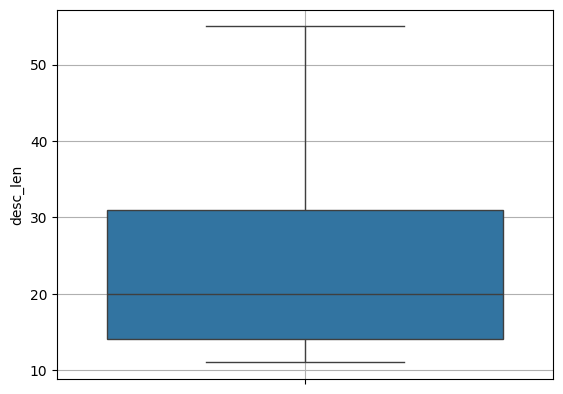

In [ ]:
sns.boxplot(df[(df.desc_len > 10) & (df.desc_len < 56)]['desc_len'])
plt.grid()
plt.show()

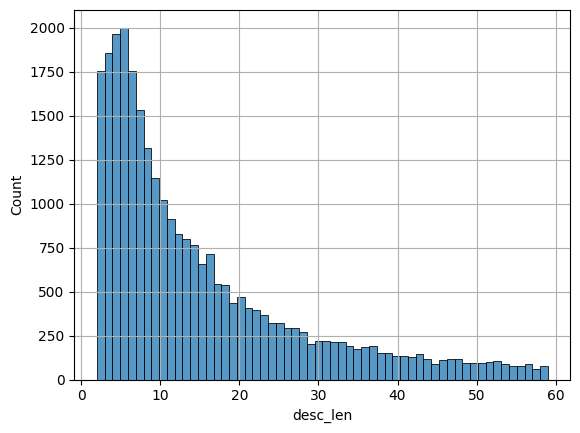

In [ ]:
sns.histplot(x=df[df['desc_len']<60]['desc_len'])
plt.grid()
plt.show()

In [ ]:
df

,imones_kodas,imones_pavadinimas,imones_aprasymas,desc_len,Nace2,EmployeesLast,gr_stat_letter,gr_stat_code,gr_4digits
0,140891278,decopolis uab,kolektyvo padėti klientui susikurti jaukius ši...,63,477890.0,1.0,G,G47,4778.0
1,133852410,dakra uab,maketavimas spaudai internetui specialūs pasiū...,8,581900.0,2.0,J,J58,5819.0
2,301572740,uab tramera,buveinės,4,412000.0,15.0,F,F41,4120.0
3,304224333,mokymų erdvė uab,augti verslui asmenybei,3,855900.0,1.0,P,P85,8559.0
4,303425493,ausvitas uab,verslo konsultacijos struktūrinių paramos fond...,17,702200.0,0.0,M,M70,7022.0
...,...,...,...,...,...,...,...,...,...
31830,151145760,zena j savicko įmonė,biuro technika orgtechnika prekyba techninė pr...,7,331200.0,0.0,C,C33,3312.0
31831,302308252,uab vytminda,pilna dalinė įmonių apskaita pirminių dokument...,12,494100.0,0.0,H,H49,4941.0
31832,302521357,eventus group uab,gamina parduoda edukacinius žaislus skirtus pi...,9,324030.0,14.0,C,C32,3240.0
31833,249931910,j žėko iį,švediškos aliuminio balkono langai patalpų per...,20,433200.0,0.0,F,F43,4332.0


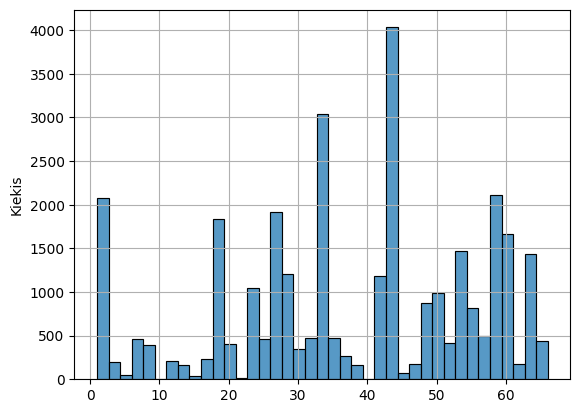

In [ ]:
sns.histplot(x=df['gr_code'])
plt.ylabel('Kiekis')
plt.xlabel('')
plt.grid()
plt.show()

In [ ]:
nace_desc.groupby('gr_code').first()

In [ ]:
nace_desc[nace_desc.gr_stat_letter.isin(['K'])]

In [ ]:
nace_desc.groupby('gr_stat_letter').first()

In [ ]:
df['gr_stat_letter'] = pd.Categorical(df['gr_stat_letter'], sorted(df['gr_stat_letter'].unique()))

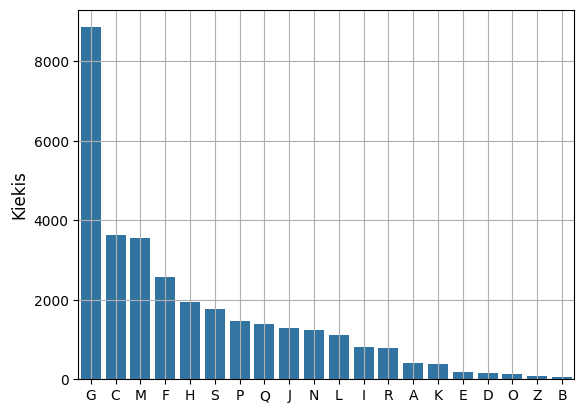

In [ ]:
sns.countplot(x=df['gr_stat_letter'],
              order=df['gr_stat_letter'].value_counts().index)
plt.grid()
plt.xlabel('')
plt.ylabel('Kiekis', fontsize=12)
plt.show()

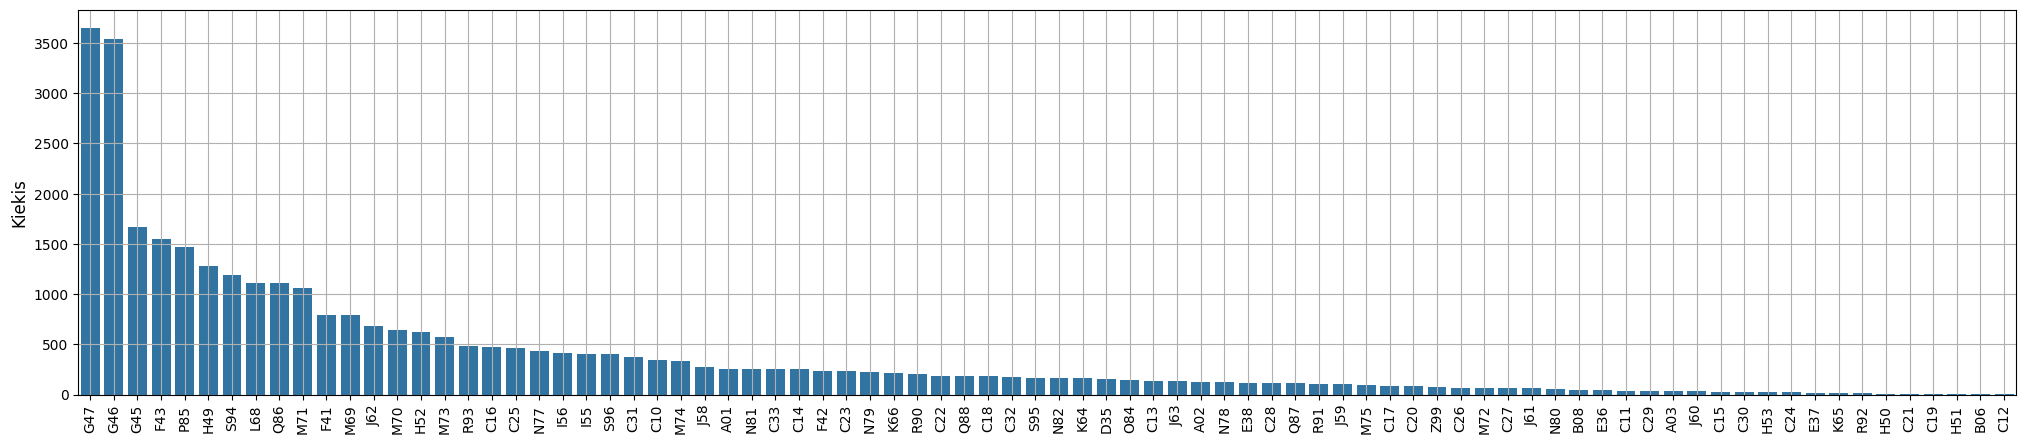

In [ ]:
fig = plt.figure(figsize=(25, 5))
sns.countplot(x=df['gr_stat_code'],
              order=df['gr_stat_code'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Kiekis', fontsize=12)
plt.grid()
plt.show()

In [ ]:
# Most common stop words
top_15 = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:15]
x, y = zip(*top_15)

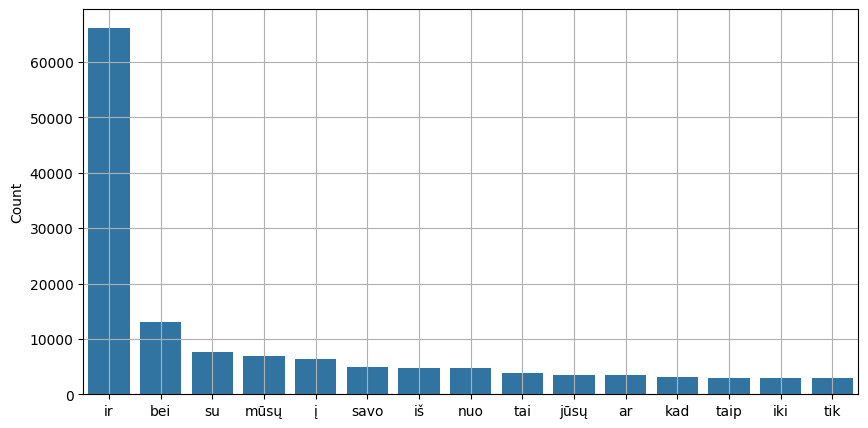

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=y)
plt.ylabel("Count")
plt.grid()
plt.show()

In [ ]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in STOP_WORDS) and len(word) > 1:
        x.append(word)
        y.append(count)

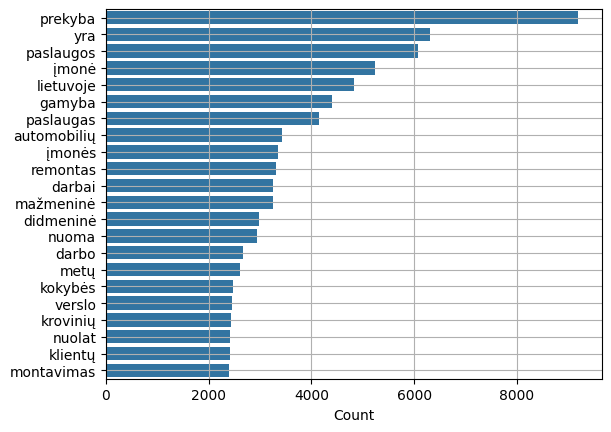

In [ ]:
sns.barplot(x=y,y=x)
plt.xlabel('Count')
plt.grid()
plt.show()

In [ ]:
from itertools import tee, islice

def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break

In [ ]:
bigrams = []
text = df['imones_aprasymas'].values.tolist()

for line in text:
  bigrams.extend(list(ngrams(line.strip().split(" "), 2)))

In [ ]:
from collections import Counter
bigrams= Counter(bigrams)

In [ ]:
top_5_bigrams = []
top_5_occurances = []
top_5_companies = []
for x in bigrams.most_common(5):
  bi = ' '.join(x[0])
  top_5_bigrams.append(bi)
  top_5_occurances.append(x[1])
  top_5_companies.append(df[df['imones_aprasymas'].str.contains(bi)].shape[0])

dist_bi = []
for i,j,k in zip(top_5_bigrams, top_5_occurances, top_5_companies):
  di = {
      'bigram':i,
      'occurances':j,
      'companies':k
  }
  dist_bi.append(di)

In [ ]:
x = pd.DataFrame(dist_bi)
x

,bigram,occurances,companies
0,mažmeninė prekyba,2642,2416
1,didmeninė prekyba,1476,1271
2,didmeninė mažmeninė,1219,1061
3,krovinių gabenimas,785,625
4,žemės ūkio,774,494


In [ ]:
x.companies *= -1

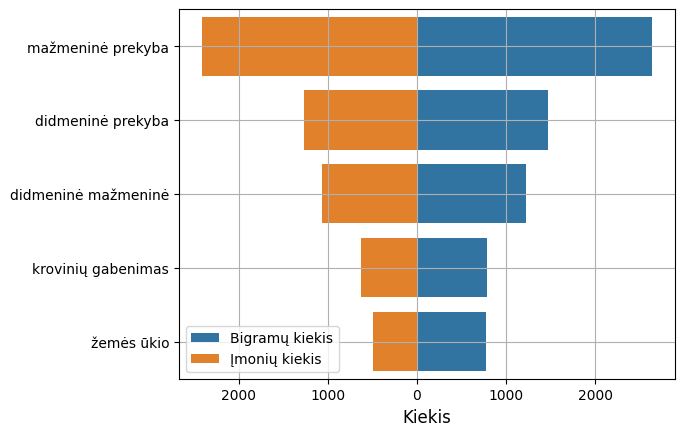

In [ ]:
sns.barplot(y=x['bigram'],x=x['occurances'], label='Bigramų kiekis')
sns.barplot(y=x['bigram'],x=x['companies'], label='Įmonių kiekis')
plt.grid()
plt.legend()
plt.xlabel("Kiekis", fontsize=12)
plt.ylabel('')
plt.xticks(ticks=[-2000, -1000, 0, 1000, 2000], labels=['2000', '1000', '0', '1000', '2000'])
plt.show()

In [ ]:
x, y= [], []
for word,count in bigrams.most_common(5):
  x.append(", ".join(word))
  y.append(count)

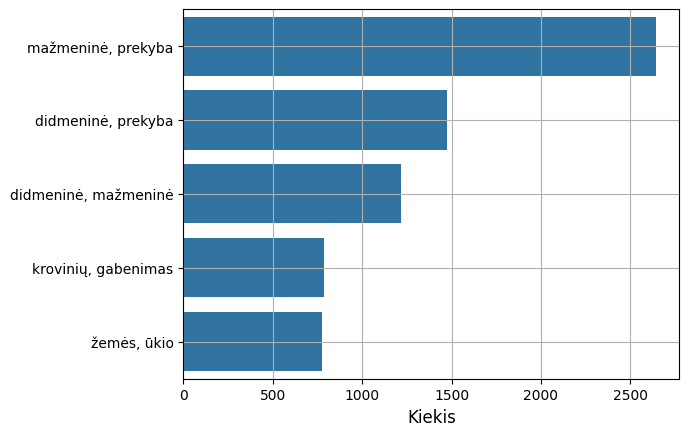

In [ ]:
sns.barplot(x=y,y=x)
plt.grid()
plt.xlabel("Kiekis", fontsize=12)
plt.show()

In [ ]:
trigrams = []
for line in text:
  trigrams.extend(list(ngrams(line.strip().split(" "), 3)))

trigrams= Counter(trigrams)

x, y= [], []
for word,count in trigrams.most_common(12):
  w = ", ".join(word)
  #if all(item not in w for item in ['viliošių', 'akmenės', 'viliošiai']): #w not in ['vilošių', 'akmenės']:
  x.append(w)
  y.append(count)

In [ ]:
top_5_tri = []
top_5_occurances = []
top_5_companies = []
for x in trigrams.most_common(5):
  bi = ' '.join(x[0])
  top_5_tri.append(bi)
  top_5_occurances.append(x[1])
  top_5_companies.append(df[df['imones_aprasymas'].str.contains(bi)].shape[0])

dist_bi = []
for i,j,k in zip(top_5_tri, top_5_occurances, top_5_companies):
  di = {
      'trigrams':i,
      'occurances':j,
      'companies':k
  }
  dist_bi.append(di)

In [ ]:
y = pd.DataFrame(dist_bi)
y

,trigrams,occurances,companies
0,didmeninė mažmeninė prekyba,1167,1016
1,krovinių gabenimas pervežimas,242,241
2,mažmeninė didmeninė prekyba,234,207
3,tabako gaminiai alus,212,212
4,paklausos namų apyvokos,211,211


In [ ]:
y.companies *= -1

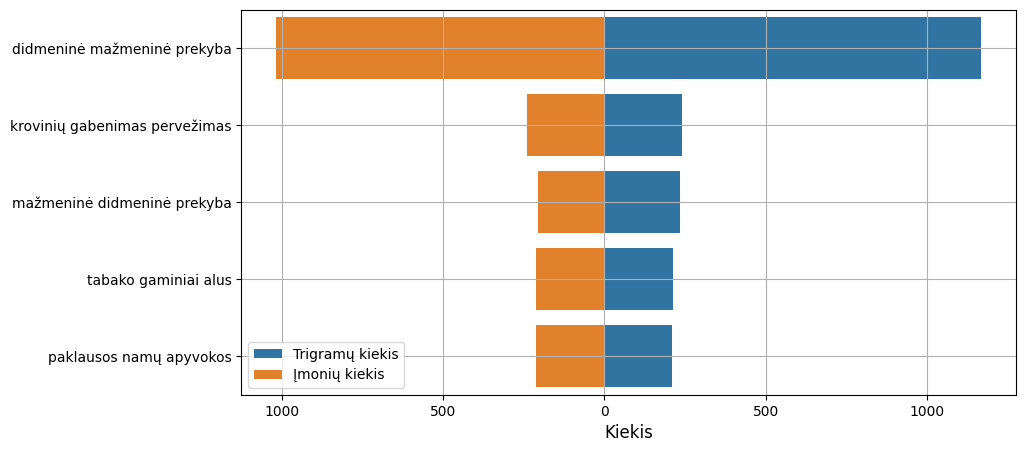

In [ ]:
fig = plt.figure(figsize=(10, 5))
bars = sns.barplot(x=y['occurances'],y=y['trigrams'], label='Trigramų kiekis')
bars_2 = sns.barplot(x=y['companies'],y=y['trigrams'], label='Įmonių kiekis')
plt.grid()

plt.legend()
plt.xlabel("Kiekis", fontsize=12)
plt.ylabel('')
plt.xticks(ticks=[-1000, -500, 0, 500, 1000], labels=['1000', '500', '0', '500', '1000'])
plt.show()

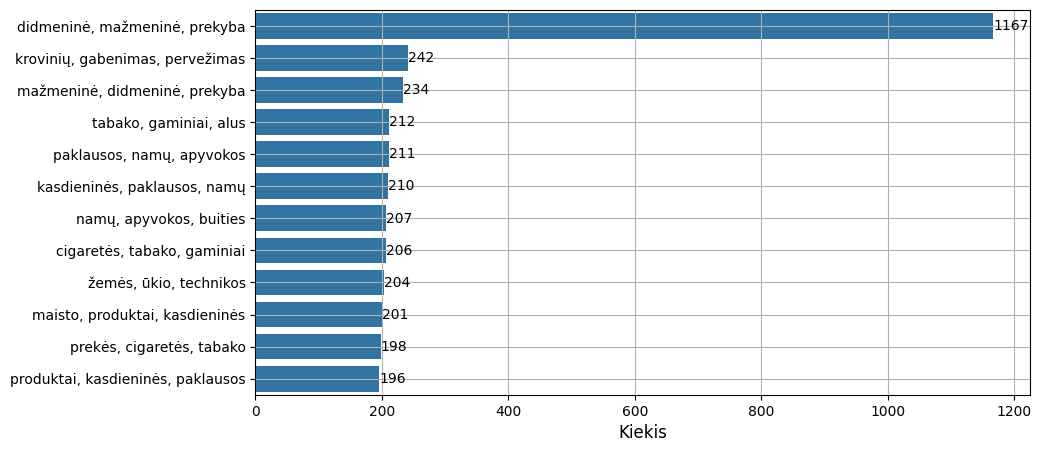

In [ ]:
fig = plt.figure(figsize=(10, 5))
bars = sns.barplot(x=y,y=x)
plt.grid()
plt.xlabel("Kiekis", fontsize=12)

for i in bars.containers:
    bars.bar_label(i,)

plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data2/clean_data.csv', index=False)

In [ ]:
corpus = []

for text in df['imones_aprasymas']:
  words = [w for w in text.split(" ") if len(w) > 1]
  corpus.append(words)

In [ ]:
import gensim

dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=20,
                                       id2word = dic,
                                       passes=5,
                                       workers=2)

In [ ]:
%%capture
!pip install funcy
!pip install tzdata
!pip install --no-deps pyLDAvis

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.224766  0.055587       1        1  16.562948
11     0.237059  0.089027       2        1   7.288742
3     -0.055479  0.280812       3        1   7.128929
4     -0.048729 -0.092741       4        1   6.609486
16    -0.024323  0.127394       5        1   5.926698
6     -0.221411  0.148786       6        1   5.323138
7     -0.112317 -0.053415       7        1   4.428459
15    -0.049606 -0.023078       8        1   4.359991
2      0.116728  0.145357       9        1   4.333114
12    -0.199108  0.032016      10        1   4.271609
18     0.088423 -0.130566      11        1   4.132827
8      0.071251  0.070431      12        1   4.078169
0     -0.126907  0.090333      13        1   3.798714
9     -0.173780 -0.196297      14        1   3.693074
10     0.197649 -0.086162      15        1   3.684411
19     0.062262 -0.069216      16        1   3.655890
14     0.146768 -0.128586      17        1   3.436055
5     -0.156255 -0.141891      18        1   2.897971
13    -0.015076 -0.040831      19        1   2.353505
1      0.038087 -0.076959      20        1   2.036270, topic_info=            Term         Freq        Total Category  logprob  loglift
22       prekyba  8346.000000  8346.000000  Default  30.0000  30.0000
319    mažmeninė  2961.000000  2961.000000  Default  29.0000  29.0000
316    didmeninė  2704.000000  2704.000000  Default  28.0000  28.0000
365     krovinių  2259.000000  2259.000000  Default  27.0000  27.0000
666     remontas  3171.000000  3171.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
817   pardavimas    74.273702  1082.533313  Topic20  -5.4001   1.2147
64        gamyba    84.418625  4186.877232  Topic20  -5.2720  -0.0099
2108    draudimo    63.049401   430.337495  Topic20  -5.5639   1.9734
41      produktų    65.403826  1018.035115  Topic20  -5.5273   1.1490
18     paslaugos    68.953102  5671.821998  Topic20  -5.4744  -0.5158

[1394 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
3117      12  0.959981       adr
3117      16  0.035121       adr
368        1  0.007298  agentūra
368        2  0.345441  agentūra
368        4  0.007298  agentūra
...      ...       ...       ...
8005      20  0.945718     žuvis
6824      19  0.978014  žvejybos
5948      18  0.986313    žvyras
15593     10  0.989193     žvyrą
12775     19  0.984355    žūklės

[4590 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 12, 4, 5, 17, 7, 8, 16, 3, 13, 19, 9, 1, 10, 11, 20, 15, 6, 14, 2])

In [ ]:
from wordcloud import WordCloud

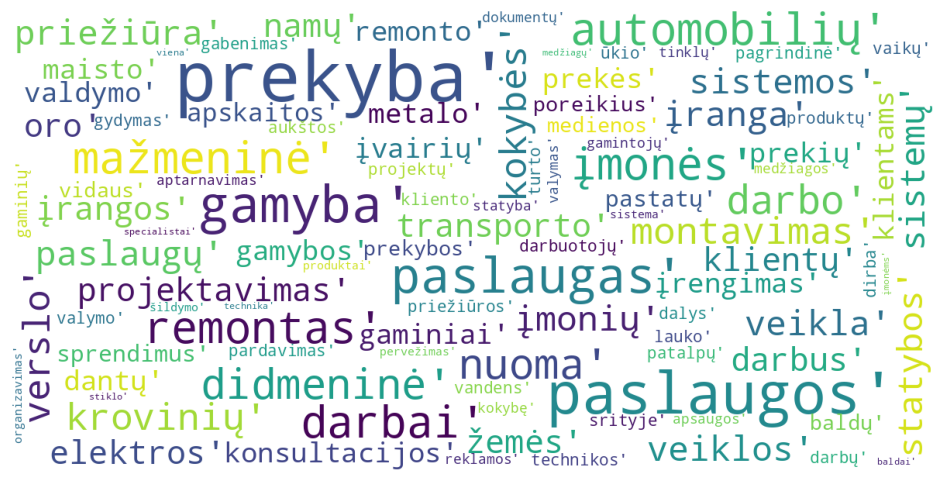

In [ ]:
wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        collocations=False)

wordcloud=wordcloud.generate(str(corpus))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

In [ ]:
def remove_(x):
  x = x.split()
  x = [i for i in x if i not in to_remove]
  x = ' '.join(x)
  x = re.sub(' +', ' ', x)
  return x

to_remove = ['pagrindinė', 'įmonės', 'veikla', 'veiklo', 'įvairių', 'buveinė',
             'paryžiaus', 'komunos', 'daly', 'aukšto', 'viena']

In [ ]:
df['imones_aprasymas'] = df.imones_aprasymas.apply(lambda x: remove_(x))

In [ ]:
words = []

for text in df['imones_aprasymas']:
  for w in text.split(" "):
     if len(w) > 1:
      words.append(w)

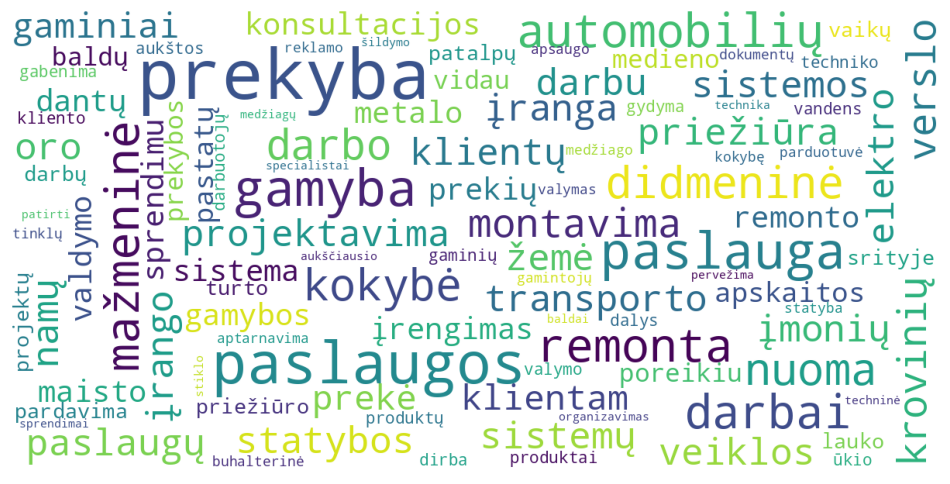

In [ ]:
wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        collocations=False)

wordcloud=wordcloud.generate(' '.join(words))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

In [ ]:
df[df['imones_aprasymas'].str.contains('imonių')].at[34051, 'imones_aprasymas']

'nestandartinių metalo gaminių kietųjų korpusinių baldų gamyba orientuota ilgalaikius ekonominius socialinius tikslus kryptingą plėtrą investicijas paslaugų kokybės gerinimą pagrindinių veiklos krypčių dalyvavimas viešųjų pirkimų konkursuose viešųjų pirkimų įstatymo supaprastinti pirkimai socialinių imonių dirba procentų neįgaliųjų pateikti užsakovui reikalingą naudingą pelningą sprendimą daugiausia dėmesio skiriama kliento poreikiams nustatyti vykdomos užduoties projektui parengti darbuotojai padeda paruošti reikalingą dokumentaciją baldų vizualizacijas'

In [ ]:
%%capture
!pip install textstat

In [ ]:
from textstat import flesch_reading_ease, dale_chall_readability_score, gunning_fog

In [ ]:
df['flesch_ease'] = df['imones_aprasymas'].apply(lambda x: flesch_reading_ease(x))
df['dale_score'] = df['imones_aprasymas'].apply(lambda x: dale_chall_readability_score(x))
df['gunning_fog'] = df['imones_aprasymas'].apply(lambda x: gunning_fog(x))

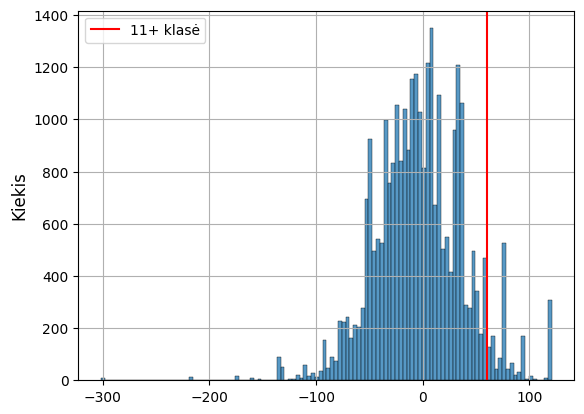

In [ ]:
sns.histplot(x=df[df['desc_len']<85]['flesch_ease'])
plt.axvline(x = 60, color = 'red', label = '11+ klasė')
plt.legend()
plt.ylabel('Kiekis', fontsize=12)
plt.xlabel('')
plt.grid()
plt.show()

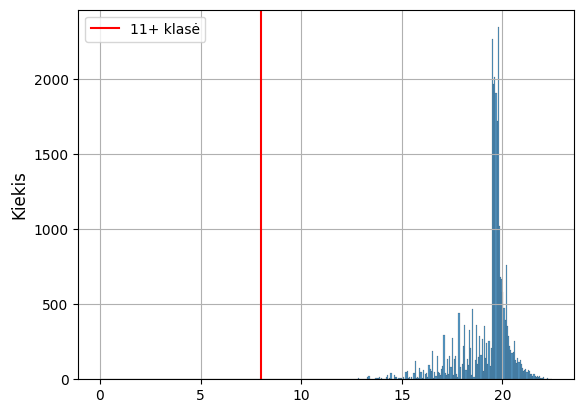

In [ ]:
sns.histplot(x=df[df['desc_len']<85]['dale_score'])
plt.axvline(x = 8, color = 'red', label = '11+ klasė')
plt.legend()
plt.ylabel('Kiekis', fontsize=12)
plt.xlabel('')
plt.grid()
plt.show()

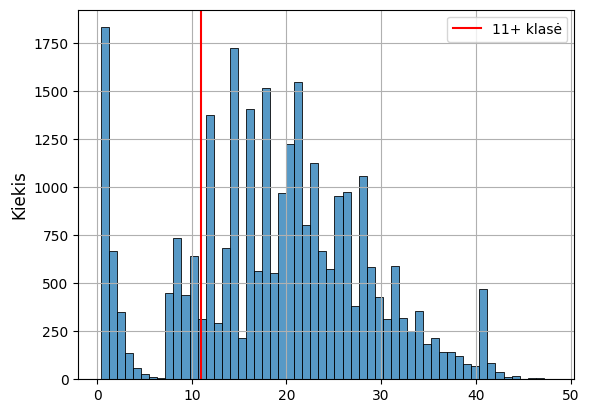

In [ ]:
sns.histplot(x=df[df['desc_len']<85]['gunning_fog'])
plt.axvline(x = 11, color = 'red', label = '11+ klasė')
plt.legend()
plt.ylabel('Kiekis', fontsize=12)
plt.xlabel('')
plt.grid()
plt.show()

In [ ]:
df.sample(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,imones_kodas,imones_pavadinimas,imones_aprasymas,desc_len,EmployeesLast,Nace2,gr_code,gr_stat_letter,gr_stat_code,gr_4digits,flesch_ease,dale_score,gunning_fog
4584,300664342,kentus uab,plokščiųjų stogų dengimas apšiltinimu lietaus ...,10,0,439100,18,F,F43,4391,19.03,19.92,16.0


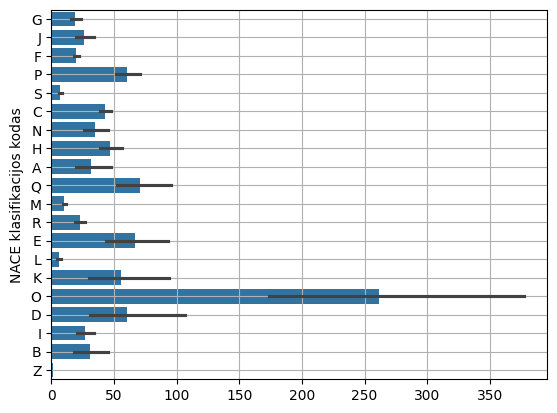

In [ ]:
sns.barplot(x='EmployeesLast', y='gr_stat_letter', data=df[df.EmployeesLast > 0])
plt.ylabel('NACE klasifikacijos kodas')
plt.xlabel('')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

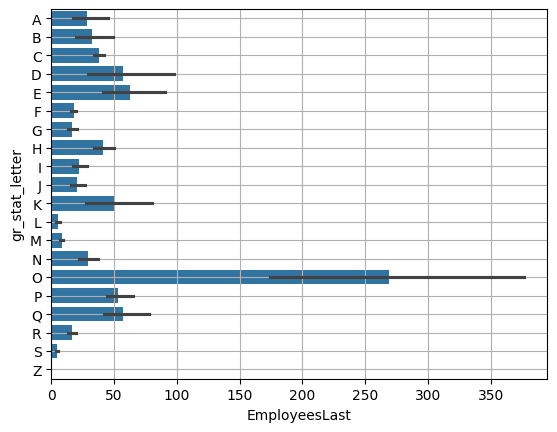

In [ ]:
sns.barplot(x='EmployeesLast', y='gr_stat_letter', data=df)
plt.grid()
plt.show()

# Clustering Experimentations

In [ ]:
from gensim.models import Word2Vec

tokenized_docs = []

for text in df['desc_post']:
  tokenized_docs.append(text.split())

In [ ]:
model = Word2Vec(sentences=tokenized_docs, vector_size=300, workers=1, seed=42)

In [ ]:
model.save('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/init_w2v')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.wv.most_similar('paruošim')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('sutvarkym', 0.7929868102073669),
 ('dokumentacij', 0.787846028804779),
 ('parengim', 0.7700200080871582),
 ('užbaigim', 0.7640564441680908),
 ('ruošim', 0.7616094350814819),
 ('skaičiavim', 0.7417499423027039),
 ('midd', 0.7277924418449402),
 ('tvarkym', 0.726645290851593),
 ('sąmat', 0.7192927002906799),
 ('ženklinim', 0.7147861123085022)]

In [ ]:
def vectorize(docs, model):
  features = []
  for tokens in docs:
    zero_vector = np.zeros(model.vector_size)
    vectors = []
    for token in tokens:
      if token in model.wv:
        try:
          vectors.append(model.wv[token])
        except KeyError:
          continue
    if vectors:
      vectors = np.asarray(vectors)
      avg_vec = vectors.mean(axis=0)
      features.append(avg_vec)
    else:
      features.append(zero_vector)
  return features

In [ ]:
vectorized_docs = vectorize(tokenized_docs, model=model)

In [ ]:
len(vectorized_docs), len(vectorized_docs[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(32000, 300)

In [ ]:
!pip install jqmcvi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement jqmcvi (from versions: none)
ERROR: No matching distribution found for jqmcvi


In [ ]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, jaccard_score, davies_bouldin_score

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=42).fit(vectorized_docs)
kmeans_preds = kmeans.predict(vectorized_docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dbs = DBSCAN(eps=3, min_samples=2).fit(vectorized_docs)
dbscan_preds = dbs.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mean_shift = MeanShift(bandwidth=2).fit(vectorized_docs)
ms_preds = mean_shift.predict(vectorized_docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
brc = Birch(n_clusters=20).fit(vectorized_docs)
brc_preds = brc.predict(vectorized_docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/'
pickle.dump(kmeans, open(PATH+'kmeans.sav', 'wb'))
pickle.dump(dbs, open(PATH+'dbs.sav', 'wb'))
pickle.dump(mean_shift, open(PATH+'meanshift.sav', 'wb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
import sys
sys.setrecursionlimit(100000)
pickle.dump(brc, open(PATH+'birch.sav', 'wb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results = pd.DataFrame()

results['imones_kodas'] = df['imones_kodas']
results['real_cat'] = df['gr_stat_letter']
results['kmeans'] = kmeans_preds
results['dbscan'] = dbscan_preds
results['mean_shift'] = ms_preds
results['birch'] = brc_preds

results.to_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/init_experiments.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


imones_kodas    31925
real_cat           20
kmeans             20
dbscan             79
mean_shift       7667
birch              20
dtype: int64

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/init_experiments.csv')
results.isna().sum()

imones_kodas    0
real_cat        0
kmeans          0
dbscan          0
mean_shift      0
birch           0
dtype: int64

In [ ]:
results.shape

(32000, 6)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/full_dataset.csv')
df.shape

(32000, 8)

In [ ]:
df['desc_len'] = df['desc_post'].str.count(r'\w+')

In [ ]:
from gensim.models import Word2Vec

tokenized_docs = []

for text in df['desc_post']:
  tokenized_docs.append(text.split())

In [ ]:
model = Word2Vec.load('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/init_w2v')

In [ ]:
def vectorize(docs, model):
  features = []
  for tokens in docs:
    zero_vector = np.zeros(model.vector_size)
    vectors = []
    for token in tokens:
      if token in model.wv:
        try:
          vectors.append(model.wv[token])
        except KeyError:
          continue
    if vectors:
      vectors = np.asarray(vectors)
      avg_vec = vectors.mean(axis=0)
      features.append(avg_vec)
    else:
      features.append(zero_vector)
  return features

In [ ]:
vectorized_docs = vectorize(tokenized_docs, model=model)

In [ ]:
import pickle

In [ ]:
kmeans = pickle.load(open('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/kmeans.sav', 'rb'))
meanshift = pickle.load(open('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/meanshift.sav', 'rb'))
dbscan = pickle.load(open('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/dbs.sav', 'rb'))
birch = pickle.load(open('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/birch.sav', 'rb'))

In [ ]:
results.dtypes

imones_kodas     int64
real_cat        object
kmeans           int64
dbscan           int64
mean_shift       int64
birch            int64
dtype: object

In [ ]:
data = []
for name in ['kmeans', 'dbscan', 'mean_shift', 'birch']:
  res = {}
  res['name'] = name
  res['silhouette_score'] = silhouette_score(vectorized_docs, results[name])
  res['calinski_harabasz_score'] = calinski_harabasz_score(vectorized_docs, results[name])
  res['davies_bouldin_score'] = davies_bouldin_score(vectorized_docs, results[name])
  data.append(res)

metrics = pd.DataFrame(data)
metrics

,name,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,kmeans,0.115920,1810.158314,1.834353
1,dbscan,-0.129121,12.890980,1.072684
2,mean_shift,0.032320,28.528245,0.958441
3,birch,0.060104,1381.090086,2.087472


A general rule of thumb is that a silhouette score above 0.5 indicates a good clustering, a silhouette score below 0.25 indicates a bad clustering, and a silhouette score between 0.25 and 0.5 indicates a fair clustering.



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_df = pca.fit_transform(vectorized_docs)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
results['pca_1'] = pca_df[:,0]
results['pca_2'] = pca_df[:,1]

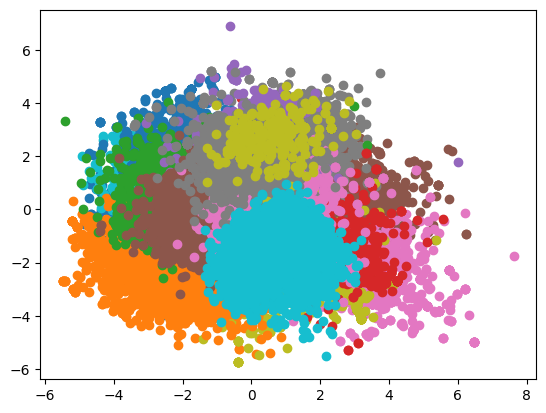

In [ ]:
u_labels = np.unique(kmeans.labels_)
for i in u_labels:
  plt.scatter(results[results['kmeans'] == i]['pca_1'], results[results['kmeans'] == i]['pca_2'])

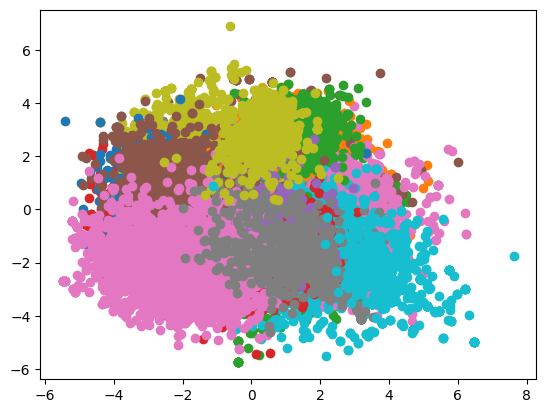

In [ ]:
u_labels = np.unique(birch.labels_)
for i in u_labels:
  plt.scatter(results[results['birch'] == i]['pca_1'], results[results['birch'] == i]['pca_2'])

In [ ]:
nace_desc = pd.read_excel('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/data/dbo_view_klasterizavimas_veiklu_evrk.xlsx')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(results['real_cat'])

In [ ]:
true_labels_encoded

array([ 6,  9, 15, ...,  2,  5, 12])

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score, fowlkes_mallows_score, normalized_mutual_info_score

In [ ]:
ari = adjusted_rand_score(results['real_cat'], results['kmeans'])
nmi = normalized_mutual_info_score(results['real_cat'],  results['kmeans'])
fmi = fowlkes_mallows_score(results['real_cat'],  results['kmeans'])

In [ ]:
ari, nmi, fmi

(0.0987977218232846, 0.2652314774402296, 0.1882626087265335)

In [ ]:
# https://medium.com/@danielafrimi/text-clustering-using-nlp-techniques-c2e6b08b6e95


## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df['desc_post']).toarray()

In [ ]:
km = KMeans(n_clusters=20, random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred = km.predict(X)

In [ ]:
silhouette_score(X, y_pred)

0.0279051395466864

In [ ]:
ari = adjusted_rand_score(results['real_cat'], y_pred)
nmi = normalized_mutual_info_score(results['real_cat'], y_pred)
fmi = fowlkes_mallows_score(results['real_cat'], y_pred)

ari, nmi, fmi

(0.029915029824381826, 0.2518023389941826, 0.1848333223463056)

In [ ]:
results['tfidf_kmean'] = y_pred

In [ ]:
calinski_harabasz_score(X, y_pred), davies_bouldin_score(X, y_pred)

(157.0063859599039, 4.895691451230617)

In [ ]:
for i in np.unique(km.labels_):
  print(f"{i} -> {results[results['tfidf_kmean'] == i]['real_cat'].value_counts().index[0]} : {results[results['tfidf_kmean'] == i]['real_cat'].value_counts()[0]}")

In [ ]:
results[results['tfidf_kmean'] == 8]['real_cat'].value_counts()

In [ ]:
results['stat_code']=df['gr_stat_code']

In [ ]:
km = KMeans(n_clusters=82, random_state=42).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(X, km)

0.039982076854120634

In [ ]:
ari = adjusted_rand_score(results['stat_code'], km)
nmi = normalized_mutual_info_score(results['stat_code'], km)
fmi = fowlkes_mallows_score(results['stat_code'], km)

ari, nmi, fmi

(0.06615515975552079, 0.33763777472527506, 0.10412842788331568)

# Sentence Transformer

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
from sentence_transformers import SentenceTransformer

https://medium.com/@danielafrimi/text-clustering-using-nlp-techniques-c2e6b08b6e95

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
df['encode_trans'] = df['desc_post'].apply(lambda text: model.encode(text, convert_to_numpy=True).flatten())
X_transformers = np.vstack(df['encode_trans'])

In [ ]:
len(X_transformers[0])

384

In [ ]:
km = KMeans(n_clusters=20, random_state=42).fit_predict(X_transformers)
silhouette_score(X_transformers, km)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.03176594

In [ ]:
ari = adjusted_rand_score(results['real_cat'], km)
nmi = normalized_mutual_info_score(results['real_cat'], km)
fmi = fowlkes_mallows_score(results['real_cat'], km)

ari, nmi, fmi

(0.03466158827529117, 0.14566803310693824, 0.141103010587425)

In [ ]:
km = KMeans(n_clusters=82, random_state=42).fit_predict(X_transformers)
silhouette_score(X_transformers, km)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.032786943

In [ ]:
ari = adjusted_rand_score(results['stat_code'], km)
nmi = normalized_mutual_info_score(results['stat_code'], km)
fmi = fowlkes_mallows_score(results['stat_code'], km)

ari, nmi, fmi

(0.04670806401138157, 0.2283979073360721, 0.0793306564238131)